In [14]:
import csv
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

In [15]:
# 한글 깨짐 방지
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

plt.rc('font', family = 'NanumBarunGothic') # 나눔 바른 고딕을 기본 글꼴로 설정
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [ ]:
f = open('/content/subwaytime.csv')
data = csv.reader(f)


for row in data:
  print(row)

헤더 제외하고 map 함수를 활용한 데이터 타입 바꾸기(문자열 -> 정수)

In [ ]:
f = open('/content/subwaytime.csv')
data = csv.reader(f)
next(data)
next(data)

for row in data:
  row[4:] = map(int, row[4:])
  print(row)

출근 시간대 사람들이 가장 많이 타고 내리는 역은 어디일까

아침 7시 승차 데이터 추출 -> 10번 인덱스 데이터 값 추출

In [ ]:
f = open('/content/subwaytime.csv')
data = csv.reader(f)
next(data)
next(data)

result = [] # 아침 7시 승하차 데이터 담을 리스트 -> 10번 인덱스에 존재

for row in data:
  row[4:] = map(int, row[4:])
  result.append(row[10])

print(len(result))
print(result)

598
[39110, 7703, 6733, 6066, 5143, 14893, 20077, 22615, 46015, 6088, 5822, 8459, 5822, 3225, 7973, 27835, 38199, 31012, 6313, 23263, 25458, 59821, 70814, 99368, 45639, 130638, 59461, 18787, 17974, 23502, 16391, 48487, 27365, 14946, 26301, 78413, 89675, 146181, 84974, 243083, 99608, 154641, 77272, 153133, 46364, 45277, 56578, 48068, 75744, 40444, 18646, 26197, 18343, 7965, 6917, 3353, 3160, 32301, 43628, 4860, 3988, 91650, 148741, 58325, 55607, 62354, 14773, 16297, 15231, 6464, 1992, 2337, 0, 5340, 25921, 27033, 24997, 17015, 13731, 16790, 28669, 8261, 27157, 36344, 15093, 8325, 25900, 3695, 25425, 21481, 38038, 22032, 23508, 26639, 49477, 101709, 59128, 108209, 141391, 127573, 54631, 92454, 88501, 52815, 33607, 17800, 5662, 7510, 10424, 5612, 6458, 12348, 18564, 5669, 11193, 13780, 4651, 49720, 78726, 3340, 6380, 12719, 21239, 19333, 31594, 42323, 9949, 24815, 39212, 15241, 47110, 44522, 37137, 89122, 28664, 89750, 19514, 28555, 71907, 42380, 77372, 43514, 16219, 48837, 9716, 9749, 21

아침 7시 승차 데이터 막대 그래프로 표현하기

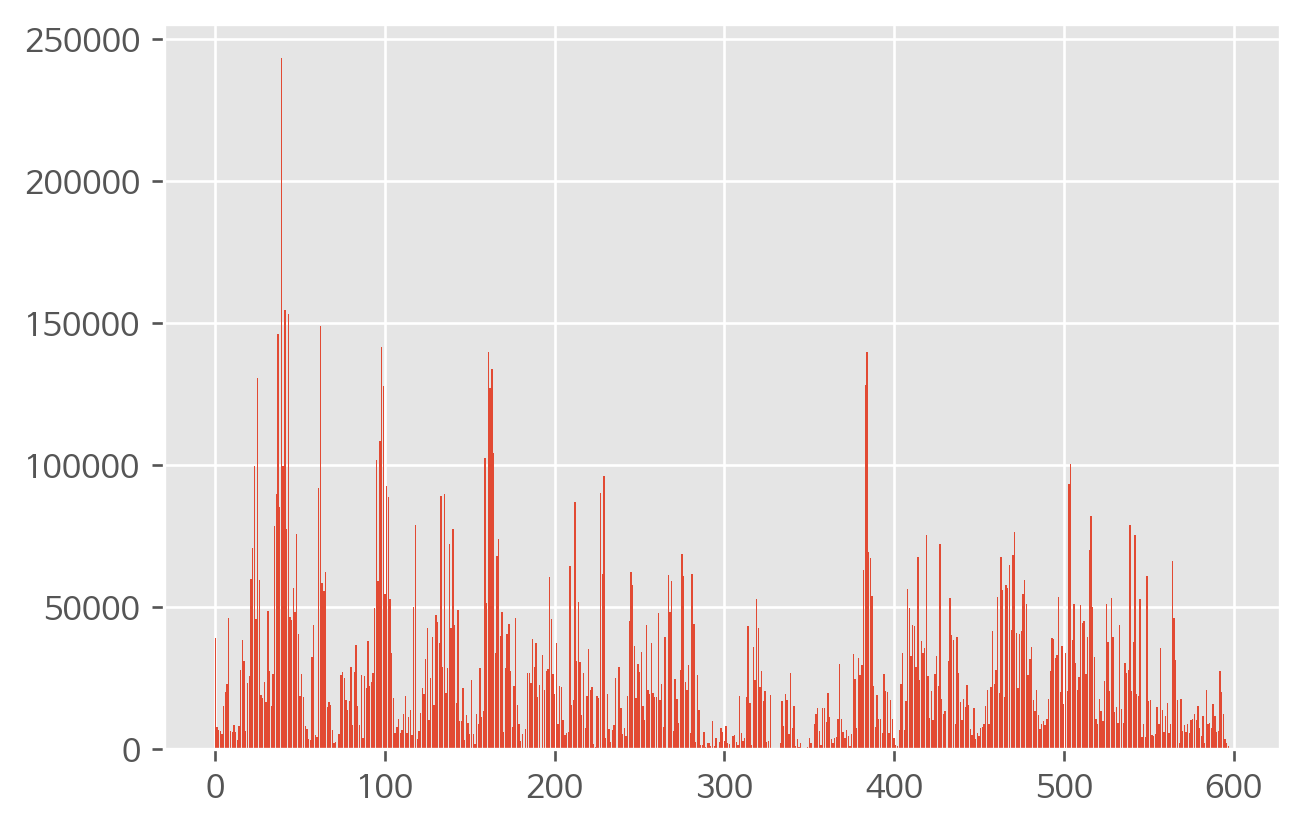

In [ ]:
f = open('/content/subwaytime.csv')
data = csv.reader(f)
next(data)
next(data)

result = [] # 아침 7시 승하차 데이터 담을 리스트 -> 10번 인덱스에 존재

for row in data:
  row[4:] = map(int, row[4:])
  result.append(row[10])

plt.figure(dpi = 120)
plt.style.use('ggplot')
plt.bar(range(len(result)), result)
plt.show()

오름차순으로 데이터 정렬하여 그래프 그리기

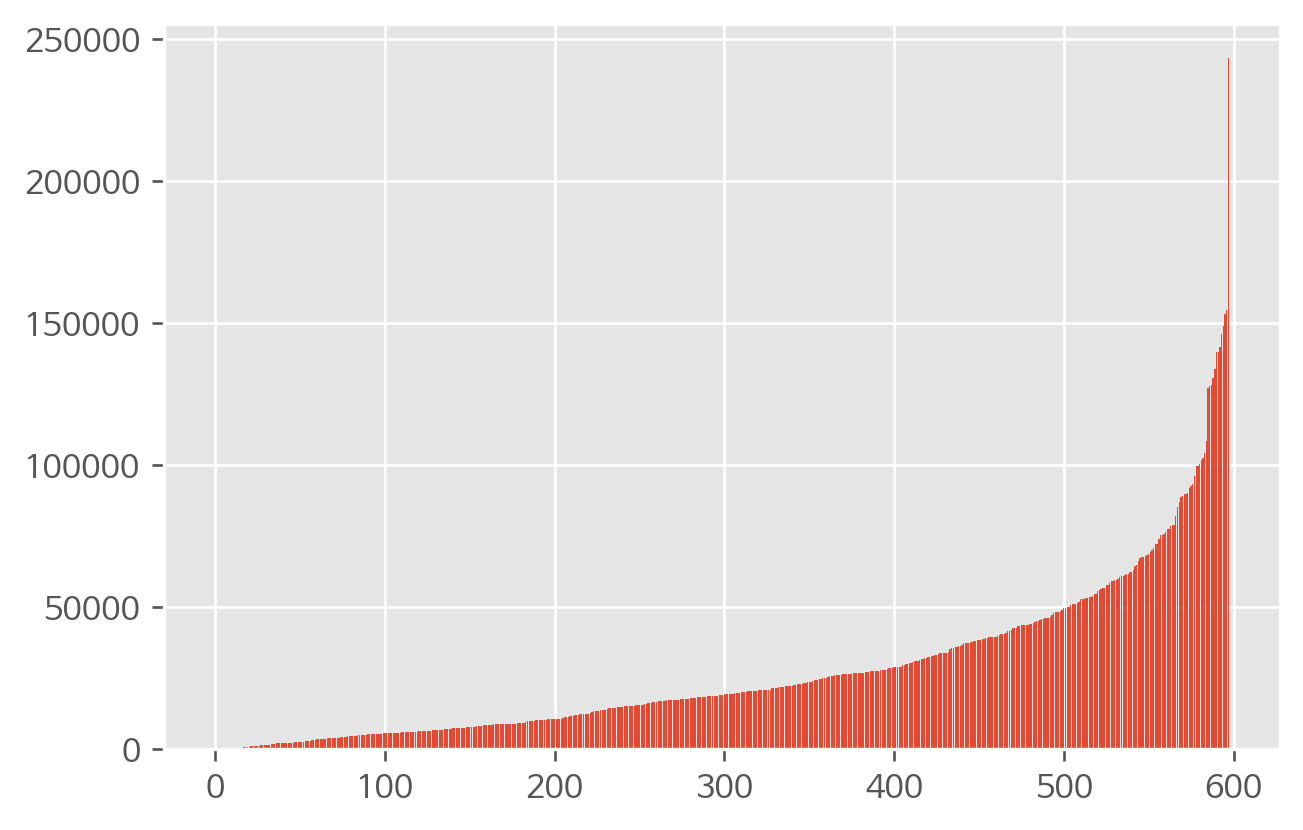

In [ ]:
f = open('/content/subwaytime.csv')
data = csv.reader(f)
next(data)
next(data)

result = [] # 아침 7시 승하차 데이터 담을 리스트 -> 10번 인덱스에 존재

for row in data:
  row[4:] = map(int, row[4:])
  result.append(row[10])

result.sort() # 데이터 오름차순으로 정렬

plt.figure(dpi = 120)
plt.style.use('ggplot')
plt.bar(range(len(result)), result)
plt.show()

출근 시간 (7~9시) 막대 그래프 그리기

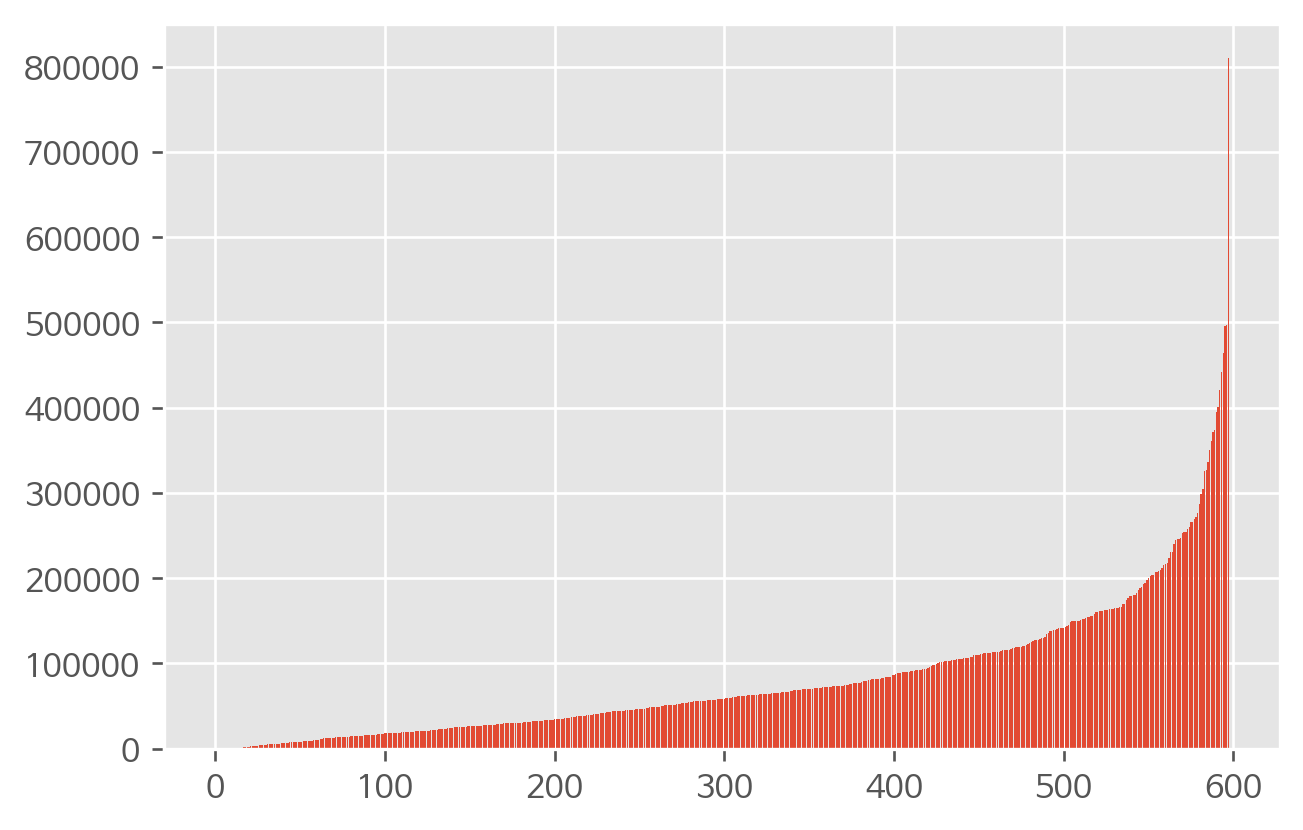

In [ ]:
f = open('/content/subwaytime.csv')
data = csv.reader(f)
next(data)
next(data)

result = [] # 출근시간 (7~9시) 승차 데이터 추출 -> 10, 12, 14 인덱스에 존재

for row in data:
  row[4:] = map(int, row[4:])
  result.append(sum(row[10 : 15 : 2]))  # 10, 12, 14 추출

result.sort() # 데이터 오름차순으로 정렬

plt.figure(dpi = 120)
plt.style.use('ggplot')
plt.bar(range(len(result)), result)
plt.show()

7시부터 9시까지 승차 인원 합계의 최댓값 찾기

In [ ]:
f = open('/content/subwaytime.csv')
data = csv.reader(f)
next(data)
next(data)

max = 0
max_station = ''

for row in data:
  row[4:] = map(int, row[4:])
  if sum(row[10 : 15 : 2]) > max:
    max = sum(row[10 : 15 : 2])
    max_station = row[3] + '(' + row[1] + ')'

print(max_station, max)

신림(2호선) 809541


출근 시간대에 사람들이 가장 많이 내리는 역 찾기

In [ ]:
f = open('/content/subwaytime.csv')
data = csv.reader(f)
next(data)
next(data)

max = 0
max_station = ''

for row in data:
  row[4:] = map(int, row[4:])
  if sum(row[11 : 16 : 2]) > max:   # 하차 인원 값 추출
    max = sum(row[11 : 16 : 2])
    max_station = row[3] + '(' + row[1] + ')'

print(max_station, max)

강남(2호선) 984427


퇴근 시간대 사람들이 가장 많이 타고 내리는 역은 어디일까?

저녁 6~8시 승차, 하차 인원 최대 역 찾기 <br>
-> 막대 그래프로 퇴근 시간대 승차 인원 표출 <br>
-> 최대 승차역 <br>
-> 최대 하차역

In [ ]:
f = open('/content/subwaytime.csv')
data = csv.reader(f)
next(data)
next(data)

max = 0
max_station = ''

for row in data:
  row[4:] = map(int, row[4:])
  if sum(row[32 : 35 : 2]) > max:
    max = sum(row[32 : 35 : 2])
    max_station = row[3] + '(' + row[1] + ')'

print(max_station, max)

강남(2호선) 723636


In [ ]:
f = open('/content/subwaytime.csv')
data = csv.reader(f)
next(data)
next(data)

max = 0
max_station = ''

for row in data:
  row[4:] = map(int, row[4:])
  if sum(row[33 : 36 : 2]) > max:   # 하차 인원 값 추출
    max = sum(row[33 : 36 : 2])
    max_station = row[3] + '(' + row[1] + ')'

print(max_station, max)

신림(2호선) 561336


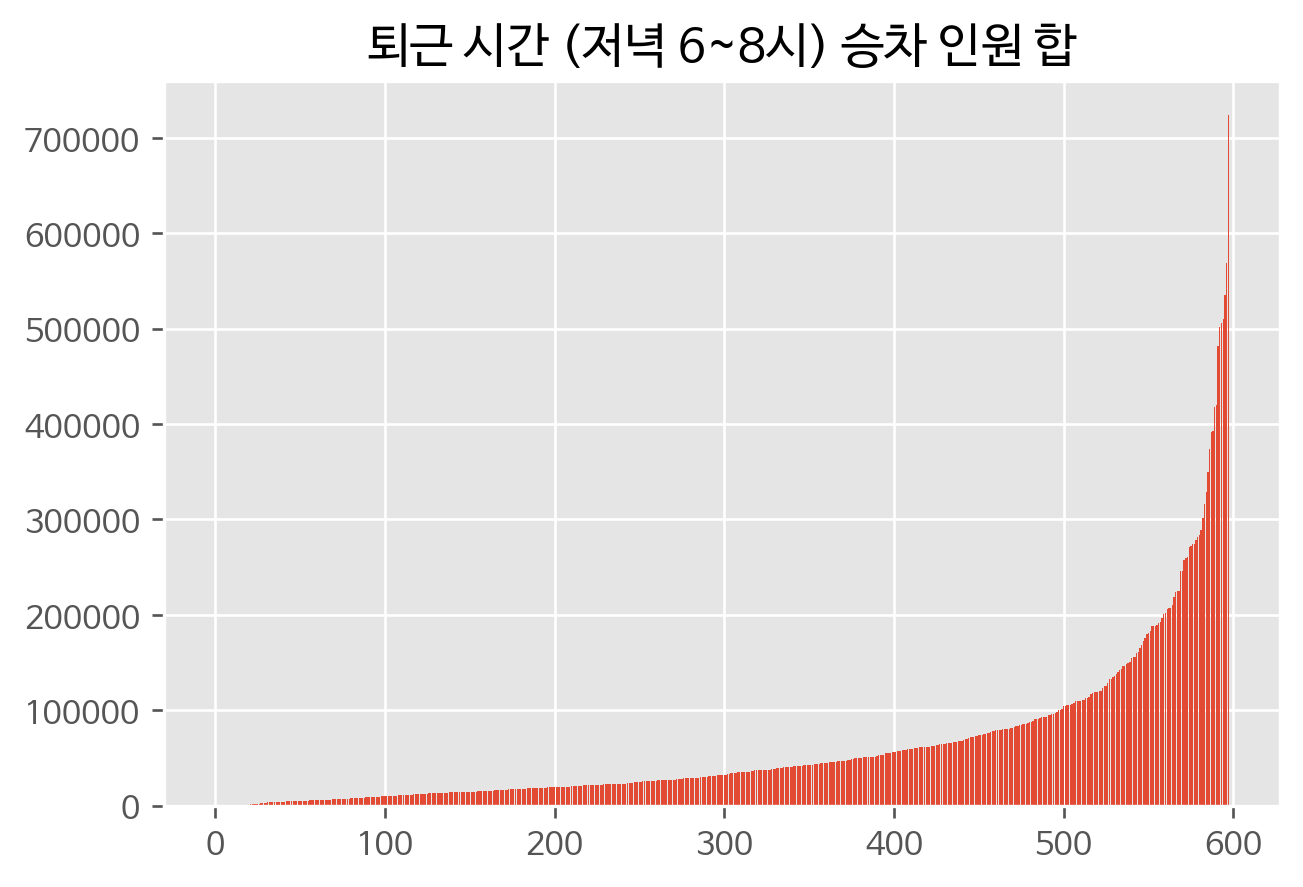

In [ ]:
f = open('/content/subwaytime.csv')
data = csv.reader(f)
next(data)
next(data)

result = [] # 출근시간 (7~9시) 승차 데이터 추출 -> 10, 12, 14 인덱스에 존재

for row in data:
  row[4:] = map(int, row[4:])
  result.append(sum(row[32 : 35 : 2]))  # 10, 12, 14 추출

result.sort() # 데이터 오름차순으로 정렬

plt.figure(dpi = 120)
plt.title('퇴근 시간 (저녁 6~8시) 승차 인원 합')
plt.style.use('ggplot')
plt.bar(range(len(result)), result)
plt.show()

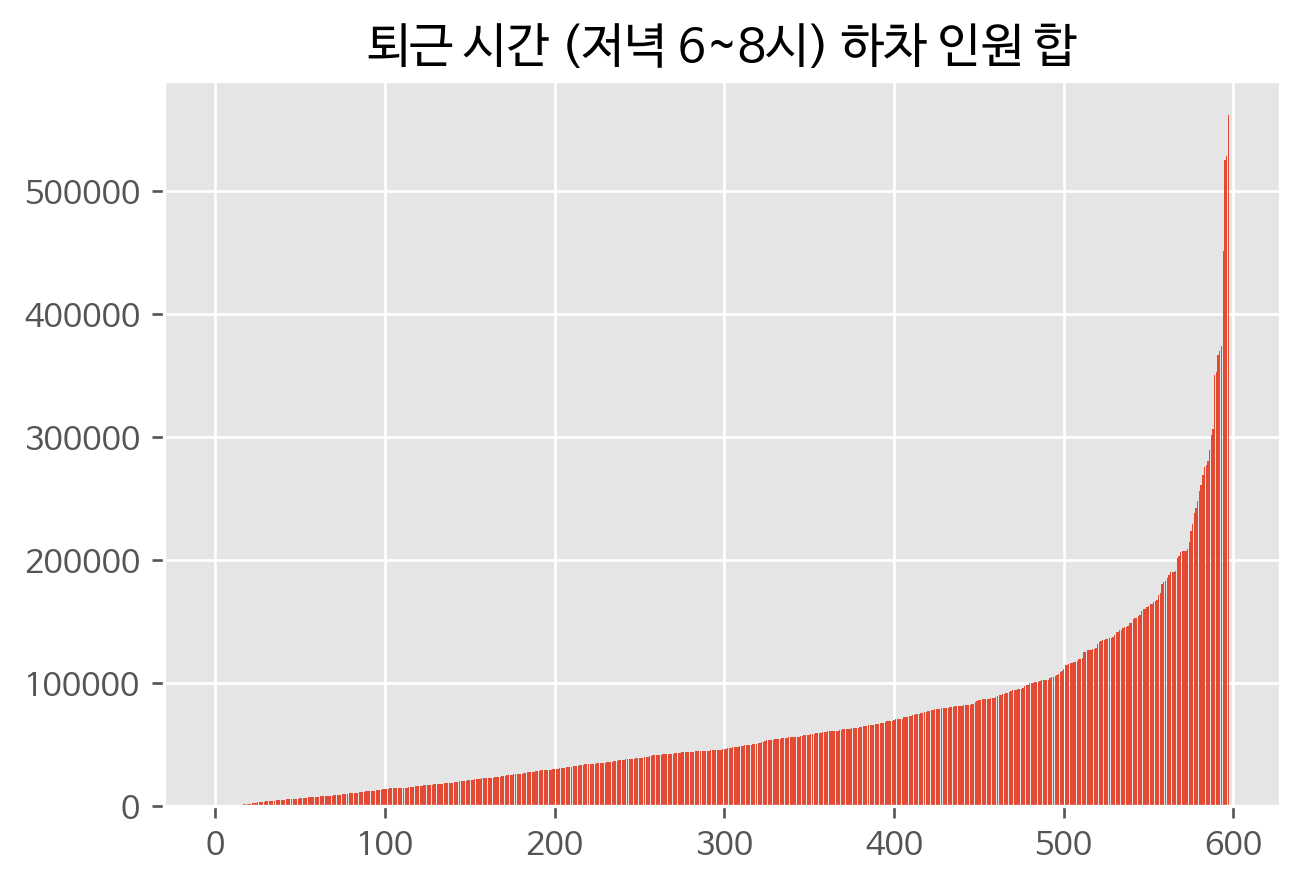

In [ ]:
f = open('/content/subwaytime.csv')
data = csv.reader(f)
next(data)
next(data)

result = [] # 출근시간 (7~9시) 승차 데이터 추출 -> 10, 12, 14 인덱스에 존재

for row in data:
  row[4:] = map(int, row[4:])
  result.append(sum(row[33 : 36 : 2]))  # 10, 12, 14 추출

result.sort() # 데이터 오름차순으로 정렬

plt.figure(dpi = 120)
plt.title('퇴근 시간 (저녁 6~8시) 하차 인원 합')
plt.style.use('ggplot')
plt.bar(range(len(result)), result)
plt.show()

밤 11시에 사람들이 가장 많이 타는 역은 어디일까

승차 패턴 찾기<br> 
승차 시각이 1시간씩 늦어질 때 마다 인덱스 2씩 늘어남 <br> 승차 시작 시간의 인덱스 값 4 -> 4시부터 승차가 시작(첫차)<br> 
승차 시각(t) 와 승차 인원이 적힌 인덱스(i) 관계 분석 <br>
i = 4 + (t -4) * 2


In [28]:
f = open('/content/subwaytime.csv')
data = csv.reader(f)
next(data)
next(data)

max = 0
max_station = ''
t = int(input('몇 시의 승차인원이 가장 많은 역이 궁금하십니까? : '))

for row in data:
  row[4:] = map(int, row[4:])
  a = row[4 + (t-4) * 2]      # 입력 받은 시각의 승차 인원 값 추출

  if a > max :
    max = a
    max_station = row[3] + '(' + row[1] + ')'

print(max_station, max)

몇 시의 승차인원이 가장 많은 역이 궁금하십니까? : 4
구로(경부선) 8418


시간대별 최대 승차 역 이름 및 승차 인원 막대 그래프로 표현하기

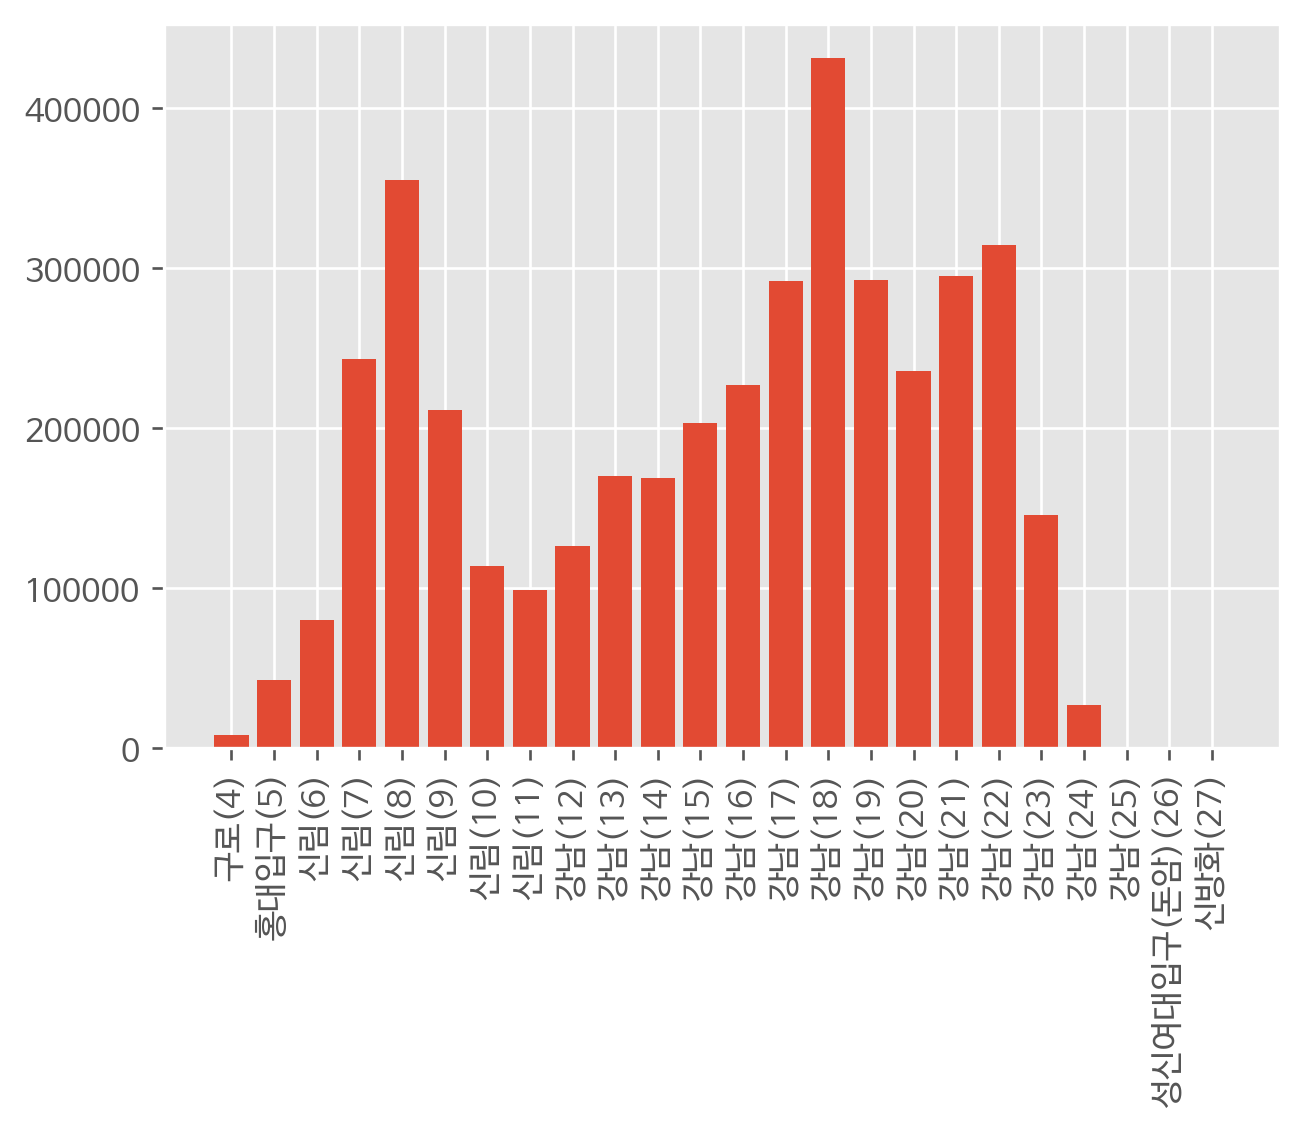

In [24]:
f = open('/content/subwaytime.csv')
data = csv.reader(f)
next(data)
next(data)

max = [0] * 24
max_station = [''] * 24

for row in data:
  row[4:] = map(int, row[4:])
  for j in range(24):
    a = row[4 + j * 2]    # 시간대별 패턴 i = j * 2 + 4 (j는 0 ~ 23까지) ...시작 인덱스가 4라서
    if a > max[j]:
      max[j] = a
      max_station[j] = row[3] + '(' + str(j+4) + ')'

plt.rc('font', family = 'NanumBarunGothic')
plt.style.use('ggplot')
plt.figure(dpi = 120)
plt.bar(range(24), max)
plt.xticks(range(24), max_station, rotation = 90)
plt.show()

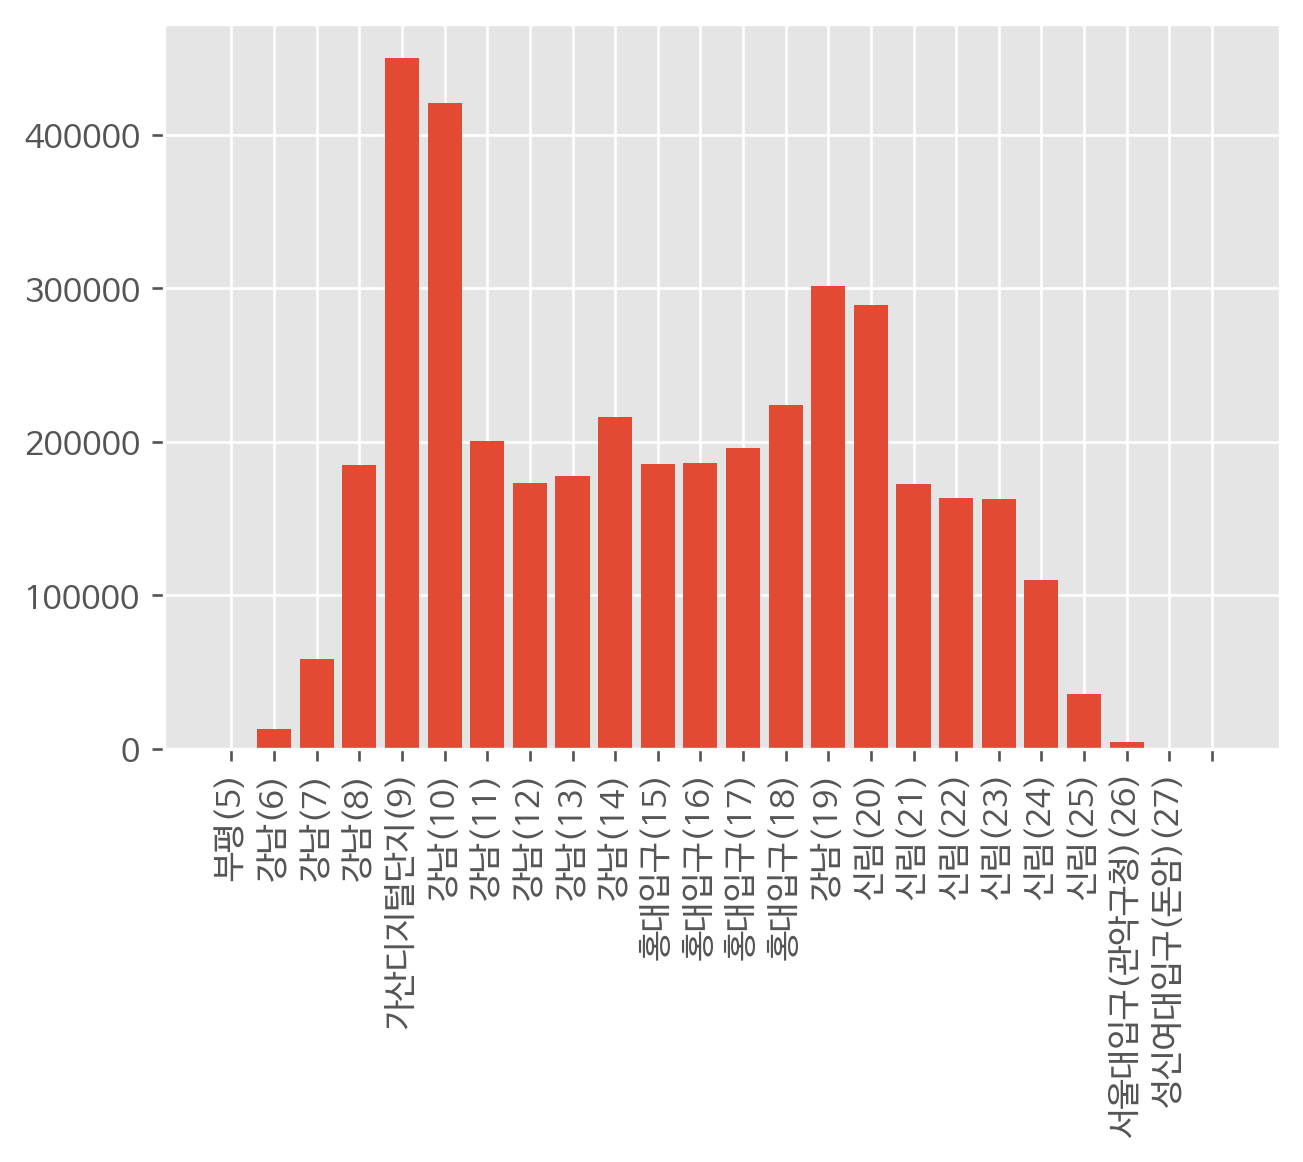

In [23]:
f = open('/content/subwaytime.csv')
data = csv.reader(f)
next(data)
next(data)

max = [0] * 24
max_station = [''] * 24

for row in data:
  row[4:] = map(int, row[4:])
  for j in range(24):
    a = row[5 + j * 2]    # 시간대별 패턴 i = j * 2 + 4 (j는 0 ~ 23까지) ...시작 인덱스가 4라서
    if a > max[j]:
      max[j] = a
      max_station[j] = row[3] + '(' + str(j+5) + ')'

plt.rc('font', family = 'NanumBarunGothic')
plt.style.use('ggplot')
plt.figure(dpi = 120)
plt.bar(range(24), max)
plt.xticks(range(24), max_station, rotation = 90)
plt.show()

모든 지하철역에서 시간대별 승하차 인원을 모두 더하면

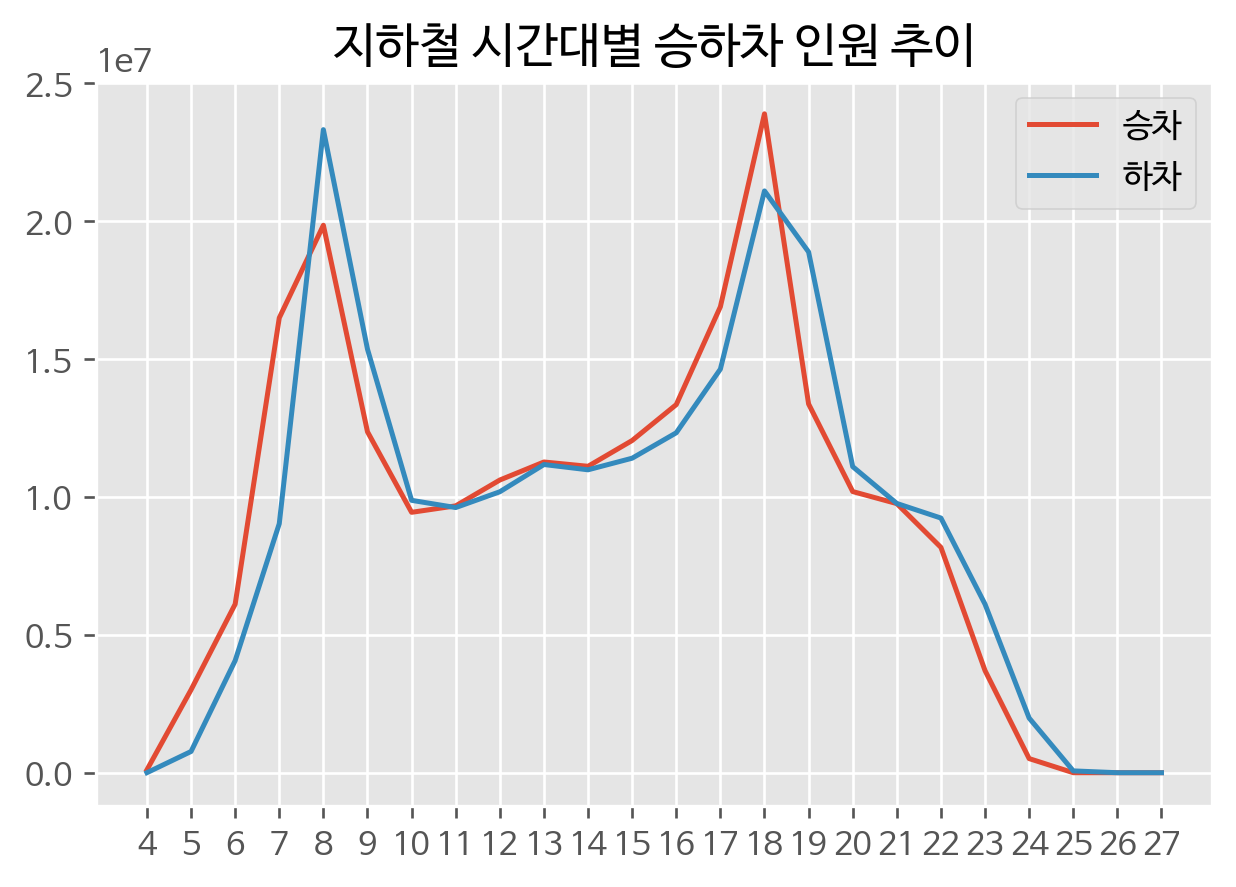

In [27]:
f = open('/content/subwaytime.csv')
data = csv.reader(f)
next(data)
next(data)

s_in = [0] * 24
s_out = [0] * 24

for row in data:
  row[4:] = map(int, row[4:])
  for i in range(24):
    s_in[i] += row[4 + i * 2] # 승차
    s_out[i] += row[5 + i * 2] # 하차

plt.rc('font', family = 'NanumBarunGothic')
plt.style.use('ggplot')
plt.figure(dpi = 120)
plt.title('지하철 시간대별 승하차 인원 추이')
plt.plot(s_in, label = '승차')
plt.plot(s_out, label = '하차')
plt.legend()
plt.xticks(range(24), range(4,28))
plt.show()